In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('house_train (5).csv')

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
# Selecting features

#**Numerical variables**

#- **SalePrice**
#- **LotArea:** Lot size in square feet
#- **OverallQual:** Rates the overall material and finish of the house
#- **OverallCond:** Rates the overall condition of the house
#- **1stFlrSF:** First Floor square feet
#- **2ndFlrSF:** Second floor square feet
#- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
#- **YearBuilt:** Original construction date (this is not technically a numeric variable but we will use it to produce another variable called Age)

#**Categorical variables**

#- **MSZoning:** Identifies the general zoning classification of the sale.
#- **LotShape:** General shape of property
#- **Neighborhood:** Physical locations within Ames city limits
#- **CentralAir:** Central air conditioning
#- **SaleCondition:** Condition of sale
#- **MoSold:** Month Sold (MM)
#- **YrSold:** Year Sold (YYYY)

In [9]:
numerical_vars= ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'YearBuilt']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [10]:
housing = housing[numerical_vars + categorical_vars]

In [12]:
housing.shape

(1460, 15)

In [13]:
housing.head()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,YearBuilt,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold
0,208500,8450,7,5,856,854,3,2003,RL,Reg,CollgCr,Y,Normal,2,2008
1,181500,9600,6,8,1262,0,3,1976,RL,Reg,Veenker,Y,Normal,5,2007
2,223500,11250,7,5,920,866,3,2001,RL,IR1,CollgCr,Y,Normal,9,2008
3,140000,9550,7,5,961,756,3,1915,RL,IR1,Crawfor,Y,Abnorml,2,2006
4,250000,14260,8,5,1145,1053,4,2000,RL,IR1,NoRidge,Y,Normal,12,2008


In [14]:
## Understanding the main variable

housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
housing['SalePrice'].mode()

0    140000
dtype: int64

In [16]:
housing['SalePrice'].median()

163000.0

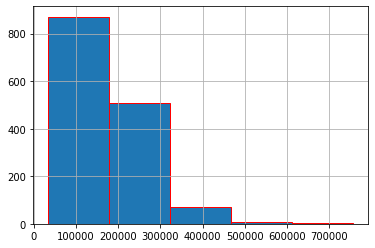

In [17]:
housing['SalePrice'].hist(edgecolor='red', bins=5);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023360EBD088>,
      dtype=object)

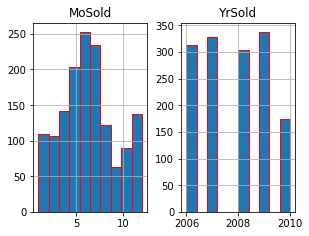

In [18]:
housing[categorical_vars].hist(edgecolor='red', bins=10, figsize=(10,8), layout=(2,4))

In [19]:
print("Skewness: {:0.3f}".format(housing['SalePrice'].skew()))
print("Kurtosis: {:0.3f}".format(housing['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


In [20]:
## Numerical variables

housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1162.626712,346.992466,2.866438,1971.267808
std,79442.502883,9981.264932,1.382997,1.112799,386.587738,436.528436,0.815778,30.202904
min,34900.000000,1300.000000,1.000000,1.000000,334.000000,0.000000,0.000000,1872.000000
25%,129975.000000,7553.500000,5.000000,5.000000,882.000000,0.000000,2.000000,1954.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1087.000000,0.000000,3.000000,1973.000000
75%,214000.000000,11601.500000,7.000000,6.000000,1391.250000,728.000000,3.000000,2000.000000
max,755000.000000,215245.000000,10.000000,9.000000,4692.000000,2065.000000,8.000000,2010.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336195E208>,
      dtype=object)

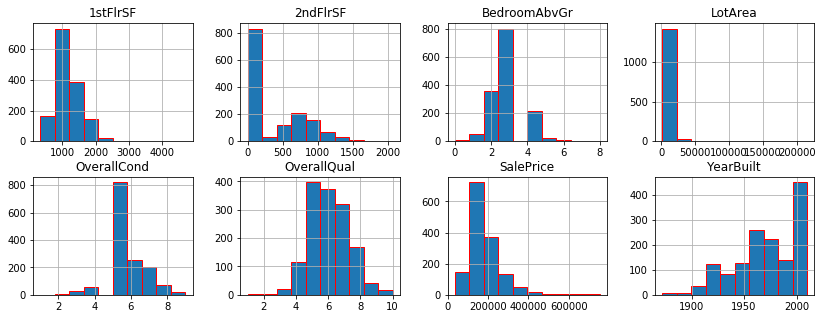

In [21]:
housing[numerical_vars].hist(edgecolor='Red', bins=10, figsize=(14,5), layout = (2,4))

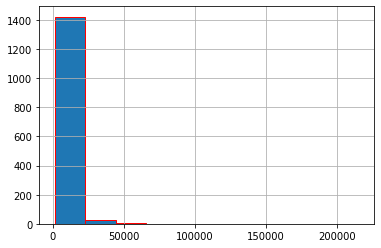

In [22]:
housing['LotArea'].hist(edgecolor='Red', bins=10)

In [26]:
#What can we see from this picture:


#1. The distribution of sizes of the first floor is skewed to the right. This is expected, there a a few big houses.
#2. There Is a big peack at zero in the 2ndFlrSF variable. Those are the variables that don't have a second floor, so we can identify a new variable from this one.
#3. Most houses have three bedrooms.
#4. The lot area Is highly skewed: there few houses with a large lot area.
#5. The ratings For conditions and quality tend to be around 5, few houses have very high or low ratings.
#6. The `YearBuilt` variable is actually not useful in the present form. However we can use it to construct a variable that actually make sense: Age of the house at the time o the sale.

In [27]:
#Variable Creation
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

In [28]:
print(housing['Age'])

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Age, Length: 1460, dtype: int64


In [30]:
#Now, it is very clear now that many houses where new when they were sold.

In [31]:
housing.head()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,YearBuilt,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold,Age
0,208500,8450,7,5,856,854,3,2003,RL,Reg,CollgCr,Y,Normal,2,2008,5
1,181500,9600,6,8,1262,0,3,1976,RL,Reg,Veenker,Y,Normal,5,2007,31
2,223500,11250,7,5,920,866,3,2001,RL,IR1,CollgCr,Y,Normal,9,2008,7
3,140000,9550,7,5,961,756,3,1915,RL,IR1,Crawfor,Y,Abnorml,2,2006,91
4,250000,14260,8,5,1145,1053,4,2000,RL,IR1,NoRidge,Y,Normal,12,2008,8


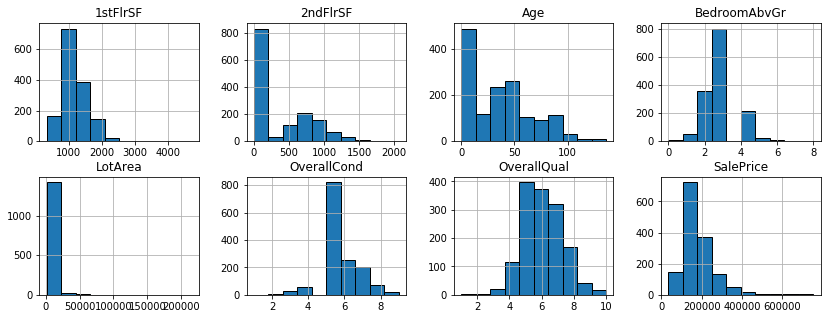

In [32]:
housing[numerical_vars].hist(edgecolor='black', bins=10, figsize=(14, 5), layout = (2,4));

In [33]:
housing[numerical_vars]

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
0,208500,8450,7,5,856,854,3,5
1,181500,9600,6,8,1262,0,3,31
2,223500,11250,7,5,920,866,3,7
3,140000,9550,7,5,961,756,3,91
4,250000,14260,8,5,1145,1053,4,8
...,...,...,...,...,...,...,...,...
1455,175000,7917,6,5,953,694,3,8
1456,210000,13175,6,6,2073,0,3,32
1457,266500,9042,7,9,1188,1152,4,69
1458,142125,9717,5,6,1078,0,2,60


AxesSubplot(0.125,0.125;0.775x0.755)


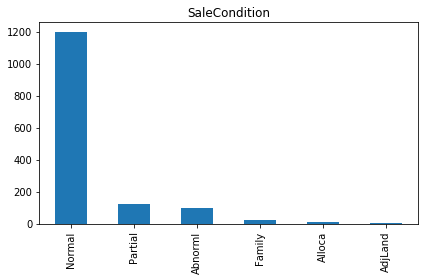

In [34]:
fig, ax = plt.subplots()
print(ax)
housing['SaleCondition'].value_counts().plot(kind='bar',ax=ax, title='SaleCondition')
fig.tight_layout()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: i

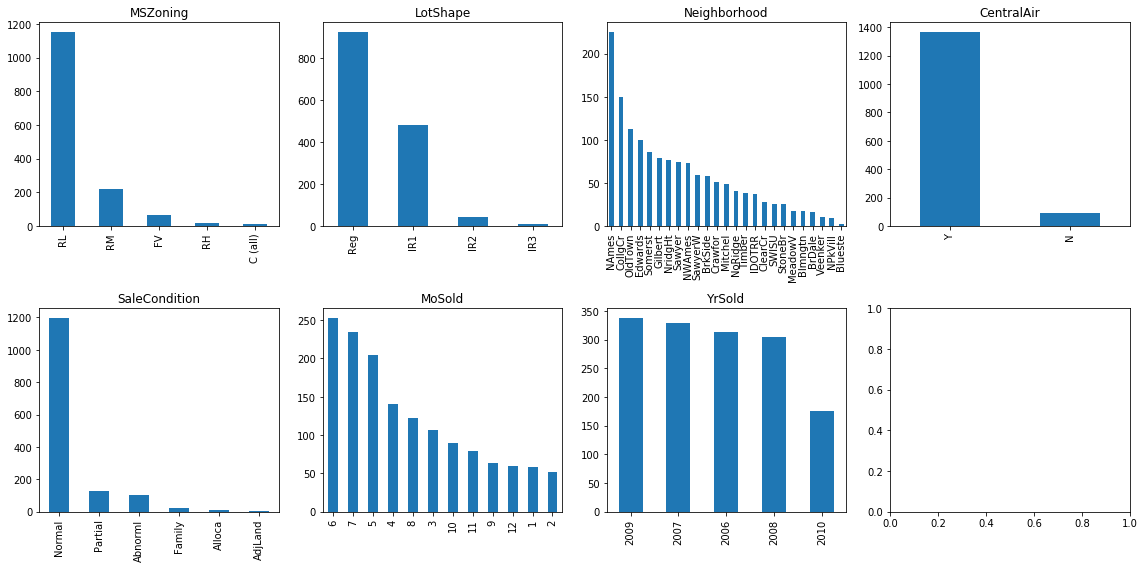

In [35]:
fig, ax = plt.subplots(2,4, figsize=(16,8))
for i, j in zip(categorical_vars, ax.flatten()):
    print(housing[i].value_counts())
    housing[i].value_counts().plot(kind='bar', ax=j, title=i)


fig.tight_layout()

In [36]:
housing['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [37]:
def identify_cat_above30(series):
    counts = series.value_counts()
    print(counts)
    return list(counts[counts>=30].index)

In [39]:
levels_to_keep = housing[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: i

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [40]:
for i in categorical_vars:
    housing = housing.loc[housing[i].isin(levels_to_keep[i])]

In [41]:
housing.shape

(1246, 16)

In [42]:
housing

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,YearBuilt,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold,Age
0,208500,8450,7,5,856,854,3,2003,RL,Reg,CollgCr,Y,Normal,2,2008,5
2,223500,11250,7,5,920,866,3,2001,RL,IR1,CollgCr,Y,Normal,9,2008,7
3,140000,9550,7,5,961,756,3,1915,RL,IR1,Crawfor,Y,Abnorml,2,2006,91
4,250000,14260,8,5,1145,1053,4,2000,RL,IR1,NoRidge,Y,Normal,12,2008,8
5,143000,14115,5,5,796,566,1,1993,RL,IR1,Mitchel,Y,Normal,10,2009,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,6,5,953,694,3,1999,RL,Reg,Gilbert,Y,Normal,8,2007,8
1456,210000,13175,6,6,2073,0,3,1978,RL,Reg,NWAmes,Y,Normal,2,2010,32
1457,266500,9042,7,9,1188,1152,4,1941,RL,Reg,Crawfor,Y,Normal,5,2010,69
1458,142125,9717,5,6,1078,0,2,1950,RL,Reg,NAmes,Y,Normal,4,2010,60


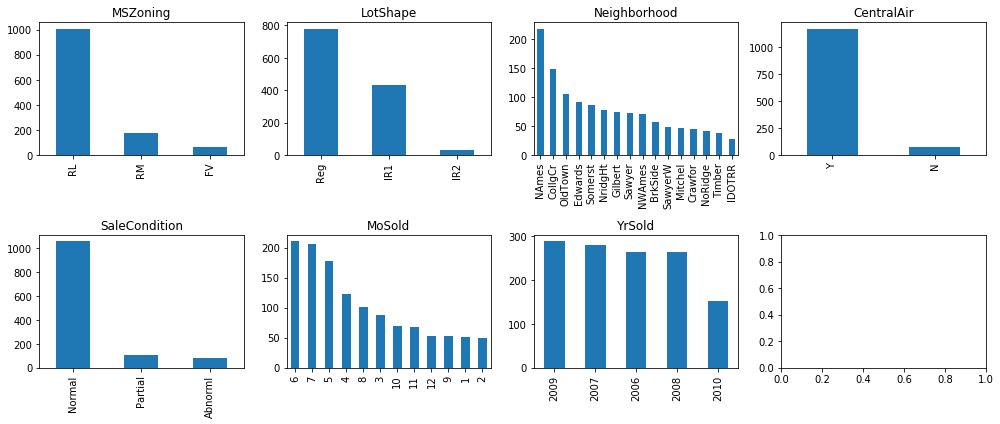

In [43]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

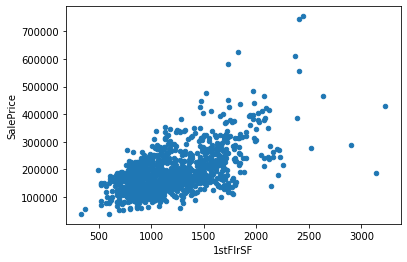

In [44]:
## Relationships between numerical variables, using seaborn library

housing.plot.scatter(x='1stFlrSF', y='SalePrice');

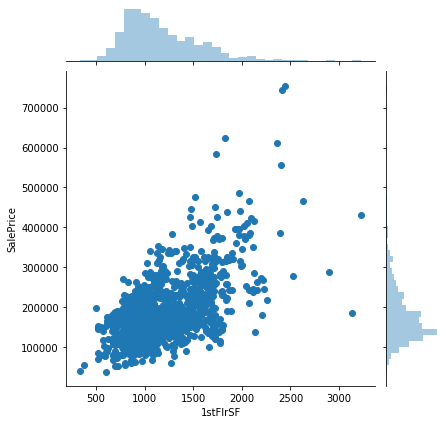

In [45]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing);

In [46]:
housing[numerical_vars[:]]

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
0,208500,8450,7,5,856,854,3,5
2,223500,11250,7,5,920,866,3,7
3,140000,9550,7,5,961,756,3,91
4,250000,14260,8,5,1145,1053,4,8
5,143000,14115,5,5,796,566,1,16
...,...,...,...,...,...,...,...,...
1455,175000,7917,6,5,953,694,3,8
1456,210000,13175,6,6,2073,0,3,32
1457,266500,9042,7,9,1188,1152,4,69
1458,142125,9717,5,6,1078,0,2,60


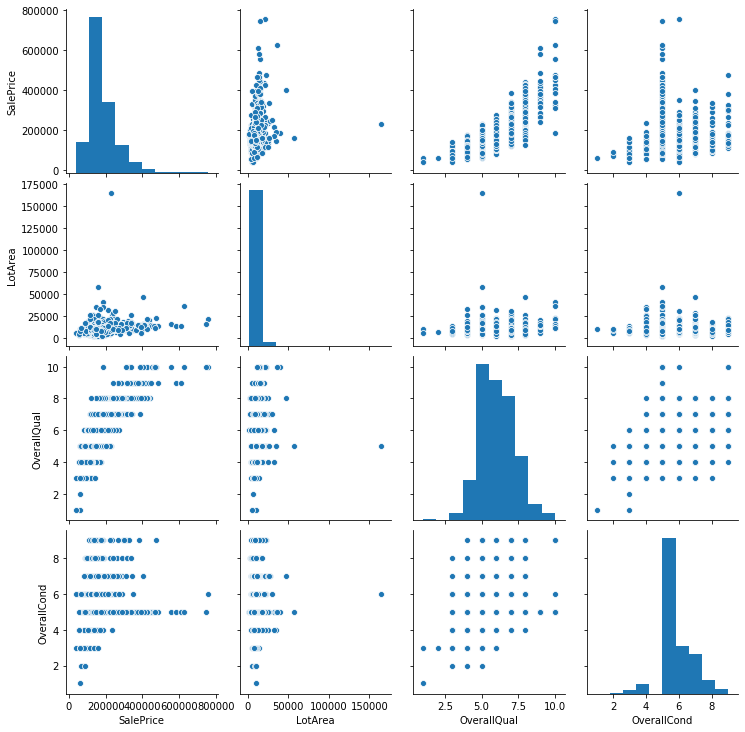

In [47]:
sns.pairplot(housing[numerical_vars[:4]]);

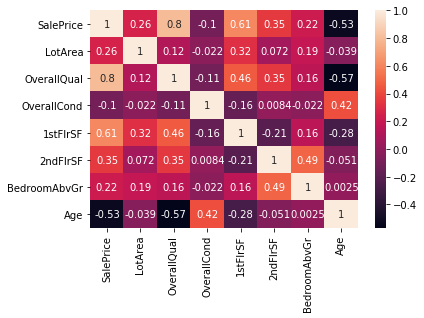

In [48]:
sns.heatmap(housing[numerical_vars].corr(), annot=True)

In [49]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


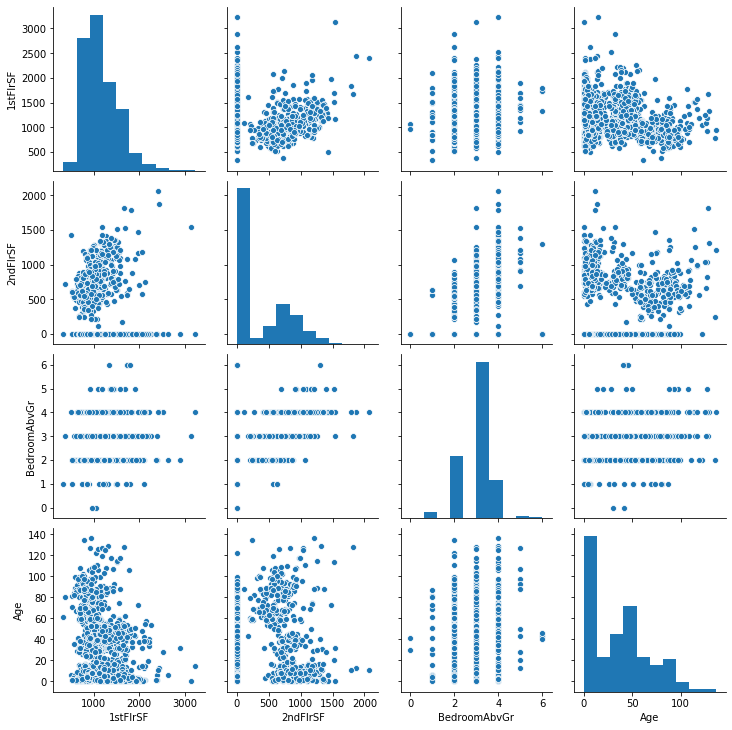

In [50]:
sns.pairplot(housing[numerical_vars[4:]])

In [51]:
print(numerical_vars[:4])

['SalePrice', 'LotArea', 'OverallQual', 'OverallCond']


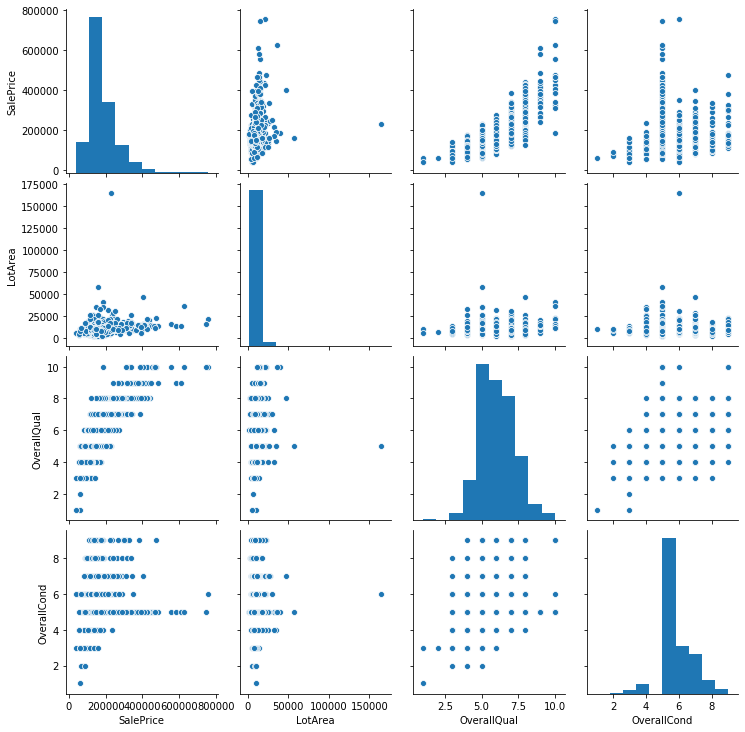

In [52]:
sns.pairplot(housing[numerical_vars[:4]])

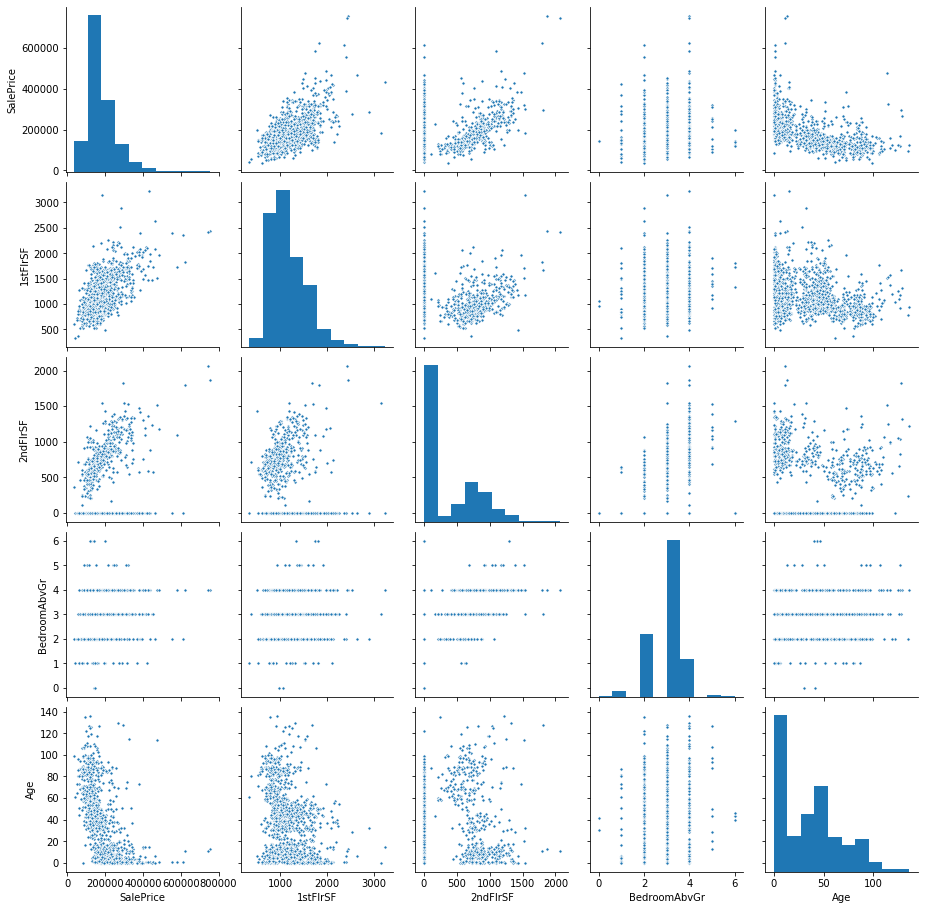

In [53]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={"s": 10});  #S is a size of the markers in the plot

In [54]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


In [55]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending =True)

Age            -0.530739
OverallCond    -0.101111
BedroomAbvGr    0.218890
LotArea         0.264047
2ndFlrSF        0.354388
1stFlrSF        0.611263
OverallQual     0.803188
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [56]:
correlations = housing[numerical_vars].corr()
correlations

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


In [57]:
print(correlations)

              SalePrice   LotArea  OverallQual  OverallCond  1stFlrSF  \
SalePrice      1.000000  0.264047     0.803188    -0.101111  0.611263   
LotArea        0.264047  1.000000     0.119991    -0.021709  0.317519   
OverallQual    0.803188  0.119991     1.000000    -0.109034  0.459432   
OverallCond   -0.101111 -0.021709    -0.109034     1.000000 -0.155206   
1stFlrSF       0.611263  0.317519     0.459432    -0.155206  1.000000   
2ndFlrSF       0.354388  0.071973     0.345501     0.008419 -0.213051   
BedroomAbvGr   0.218890  0.190736     0.162826    -0.021736  0.157983   
Age           -0.530739 -0.038842    -0.568832     0.420063 -0.277169   

              2ndFlrSF  BedroomAbvGr       Age  
SalePrice     0.354388      0.218890 -0.530739  
LotArea       0.071973      0.190736 -0.038842  
OverallQual   0.345501      0.162826 -0.568832  
OverallCond   0.008419     -0.021736  0.420063  
1stFlrSF     -0.213051      0.157983 -0.277169  
2ndFlrSF      1.000000      0.486526 -0.050952  

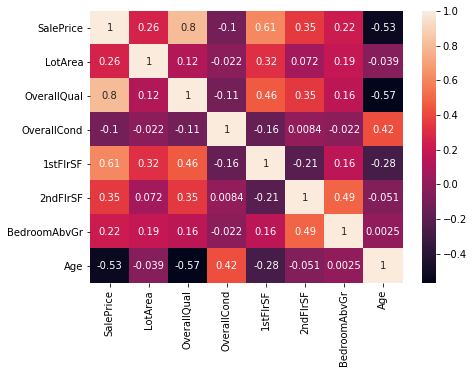

In [58]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax, annot=True);

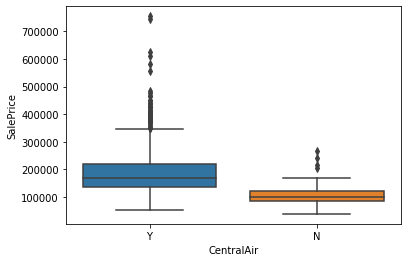

In [59]:
## Relationship of SalePrice with categorical variables

sns.boxplot(x='CentralAir', y='SalePrice', data=housing)

In [60]:
categorical_vars

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']

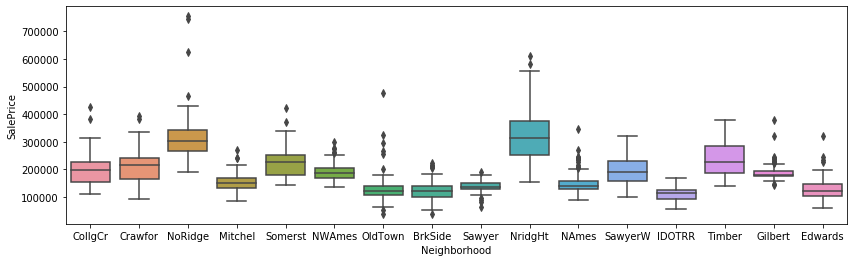

In [61]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);

In [62]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

In [63]:
housing.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
BrkSide    124410.087719
CollgCr    197502.456376
Crawfor    211080.822222
Edwards    127570.329670
Gilbert    190589.743243
IDOTRR     110471.428571
Mitchel    154172.521739
NAmes      145894.922018
NWAmes     191373.642857
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    129434.792453
Sawyer     137579.625000
SawyerW    198546.530612
Somerst    225379.837209
Timber     238659.540541
Name: SalePrice, dtype: float64

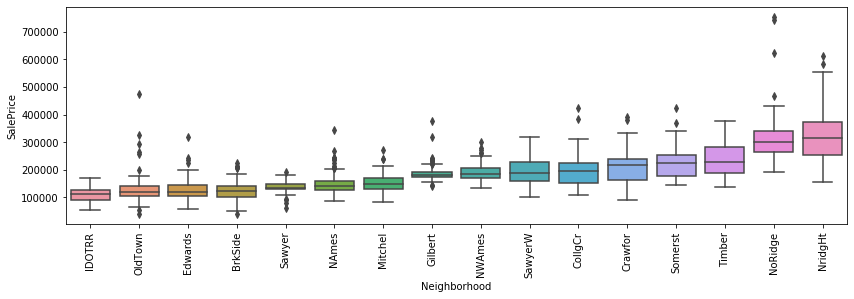

In [64]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

In [65]:
sorted_nb

array(['IDOTRR', 'OldTown', 'Edwards', 'BrkSide', 'Sawyer', 'NAmes',
       'Mitchel', 'Gilbert', 'NWAmes', 'SawyerW', 'CollgCr', 'Crawfor',
       'Somerst', 'Timber', 'NoRidge', 'NridgHt'], dtype=object)